# Project 4
__Mohammed Aljubori__

In [125]:
import folium
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools

import numpy as np
import pandas as pd
init_notebook_mode(connected=True)


1) Load the housing_price.csv file and create the following map visualization with Folium.<br>
a.	The housing_price.csv spreadsheet include four columns: latitude, longitude, streetname, streetno, and price2014.<br>
b.	Place markers on a base map (OpenStreetMap). Each marker represents one house based on its latitude and longitude. Each marker should be a circle filled with red color and with a black line.<br>
c.	When the mouse cursor hovers over a marker, the streetno and streetname, and price2014 should be displayed in a tooltip.<br>
d.	Write your code in Jupyter Notebook. Submit the Jupyter Notebook and a PDF file with the figure. <br>


In [126]:
df = pd.read_csv('Housing_price.csv')
m = folium.Map(location=[42.31533, -72.694], zoom_start=12)

df["text"] = df["streetno"].map(str) +' '+ df["streetname"] + ' $' + df['price2014'].round(2).map(str)
df.apply(lambda row:folium.CircleMarker(
    location=[row["latitude"], row["longitude"]],popup=row['text'],
    fill_color='red', color = 'black', fill_opacity='1').add_to(m),axis=1)
m

2.	(Figure 2, 30 points) Create a network visualization of the 2019 Women’s World Cup Bracket using GraphViz. <br>
a.	Here are some examples  <br>
    i.	https://www.fifa.com/womensworldcup/matches/<br>
    ii.	http://www.espn.com/soccer/bracket/_/league/fifa.wwc<br>
b.	Each node should contain the names of the countries and the score. National flags are optional. <br>
c.	There must be edges with arrows pointing from one stage to the next. <br>
d.	Submit the DOT script file and a PDF file of the figure. <br>


__The dot code from GraphWiz is in the zip file__

<img src="Proj4Q2Graph.PNG">

3.	(Figure 3, 35 points) Create a music collaboration network visualization using Plotly. <br> 
a.	Select 10 singers/musicians. For each musician, identify at least two collaborators and the songs they collaborated on. The more artists you include in your visualization the better. <br>
      i.	For example, Drake collaborated with Rihanna on “Work” and “What’s My Name?”, with Lil Wayne on “She Will”, etc. <br>


In [113]:
data = [('A$AP Rocky','Groupie Love','Playboi', "Summer Bummer"),
        ('Halsey',"Him and I","A$AP Rocky", "No Limit"),
        ('Jay-Z','APESH*T',"Kendrick Lamar", "Freedom"),
        ('Lana Del Rey','Prisoner',"Drake", "The Zone"),
        ('JuiceWRLD',"Without Me","Khalid", "East Side"),
        ('The Weeknd',"Power is Power","SwaeLee", "SickoMode"),
        ('G-Eazy',"Order More","Nicki Minaj", "Truffle Butter"),
        ('Beyonce',"APESH*T",'Childish Gambino',"Youth 4 Eva"),
        ('The Weeknd',"The Zone","A$AP Rocky", "F***in Problem"),
        ('Billie Eilish',"Lovely","Halsey", "East Side"),


       ]

col_names = ['Collab1', 'Song1', 'Collab2', 'Song2']
row_names = ['Lana Del Rey', 'G-Eazy', " Beyonce", "The Weeknd",
             'Halsey', 'Travis Scott', 'Lil Wayne', 'Jay-Z', "Drake", 'Khalid']

dt = pd.DataFrame.from_records(data, columns=col_names, index=row_names).reset_index()
dt = dt[['index', 'Collab1', 'Song1', 'Collab2','Song2']]
dt


,index,Collab1,Song1,Collab2,Song2
0,Lana Del Rey,A$AP Rocky,Groupie Love,Playboi,Summer Bummer
1,G-Eazy,Halsey,Him and I,A$AP Rocky,No Limit
2,Beyonce,Jay-Z,APESH*T,Kendrick Lamar,Freedom
3,The Weeknd,Lana Del Rey,Prisoner,Drake,The Zone
4,Halsey,JuiceWRLD,Without Me,Khalid,East Side
5,Travis Scott,The Weeknd,Power is Power,SwaeLee,SickoMode
6,Lil Wayne,G-Eazy,Order More,Nicki Minaj,Truffle Butter
7,Jay-Z,Beyonce,APESH*T,Childish Gambino,Youth 4 Eva
8,Drake,The Weeknd,The Zone,A$AP Rocky,F***in Problem
9,Khalid,Billie Eilish,Lovely,Halsey,East Side


b.	Create a network visualization of the collaborations. <br>
    i.	Each node represents a musician with the name of the musician displayed. <br>
ii.	Each edge represents a collaboration between two musicians. The name of the song should be displayed next to the edge.  <br>
iii.	If more than two musicians collaborated in a project, each musician should be connected to every other musician.<br> 
iv.	If two musicians collaborated more than once, create multiple edges between them.  <br>
v.	Pictures are optional. <br>
vi.	Here is an example of Jazz music collaboration network visualization: https://linkedjazz.org/network/<br>


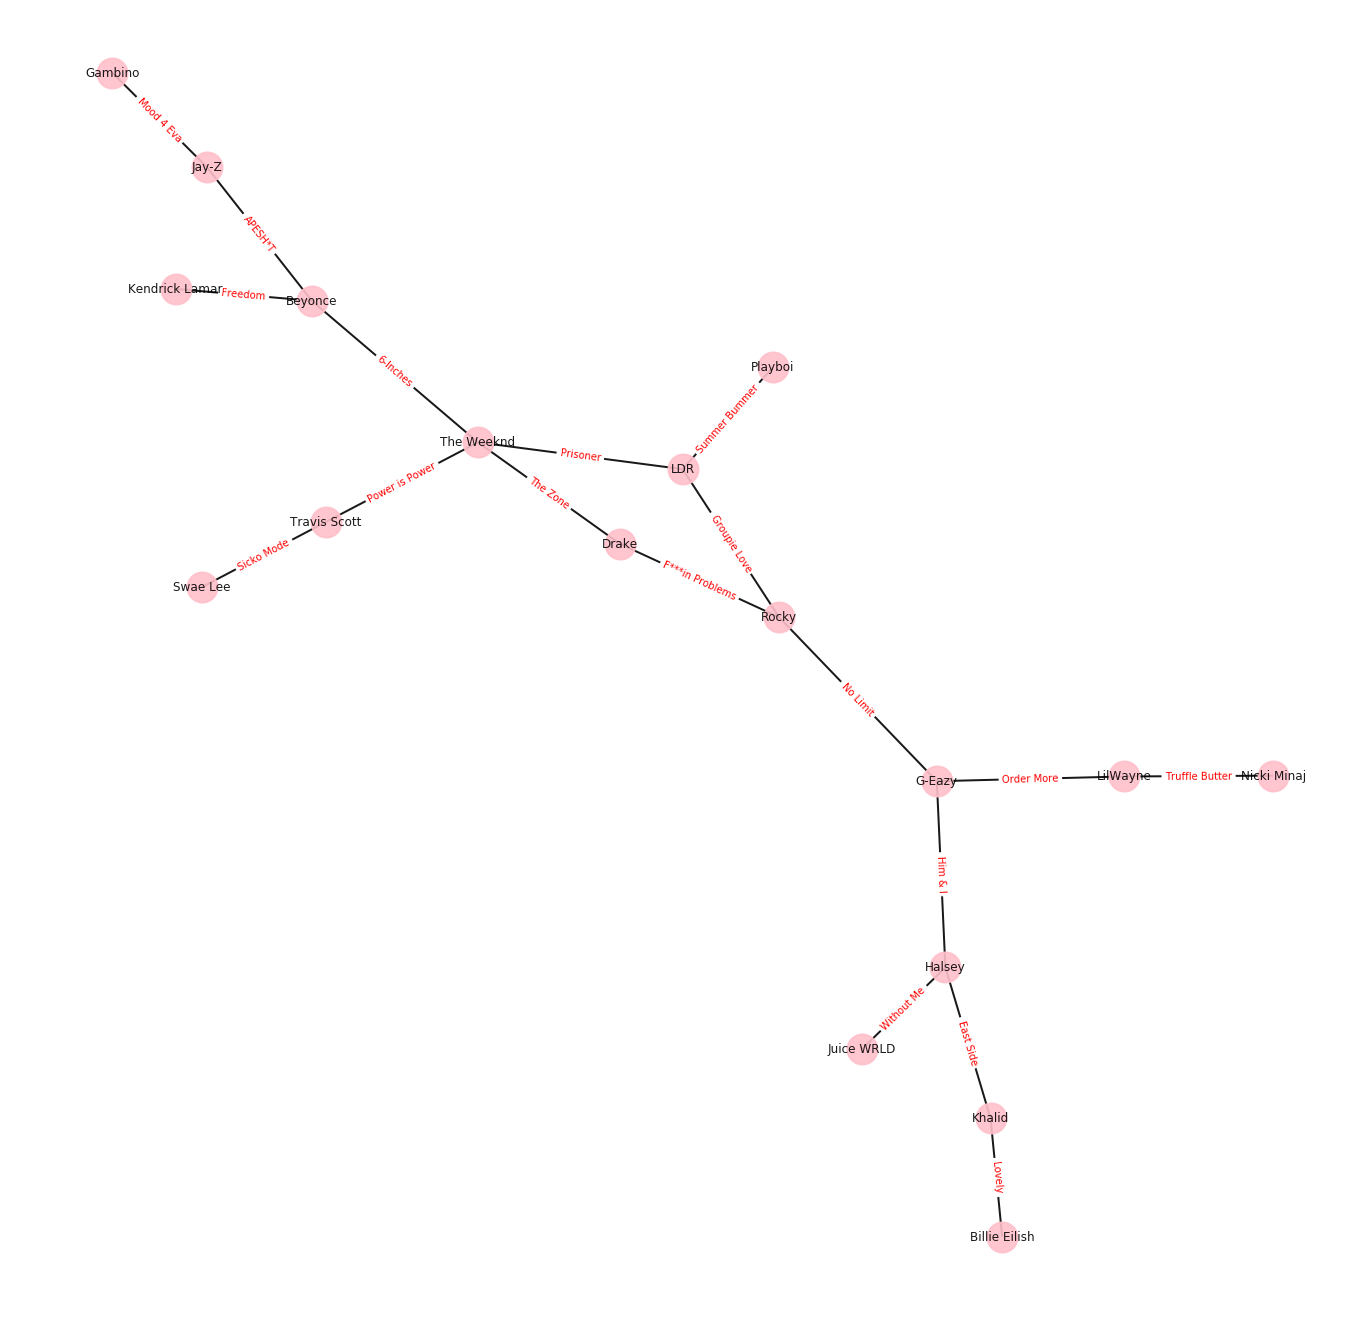

In [116]:
import networkx as nx
import matplotlib.pyplot as plt

edges=[['LDR','Rocky'],['LDR','Playboi'],['G-Eazy','Halsey'],['LDR','The Weeknd'], ['The Weeknd', 'Beyonce']
       ,['Beyonce', 'Jay-Z'], ['The Weeknd', 'Travis Scott'], ['Travis Scott', 'Swae Lee'], ['Drake', 'The Weeknd']
       ,['Beyonce', 'Kendrick Lamar'],['Halsey', 'Juice WRLD'],['G-Eazy','Rocky'], ['LilWayne', 'Nicki Minaj'], 
       ['Drake', 'Rocky'], ['G-Eazy', 'LilWayne'], ['Halsey', 'Khalid'], ['Jay-Z', 'Gambino'],['Khalid', 'Billie Eilish']]

G=nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(4,figsize=(18,18)) 
nx.draw(G,pos,edge_color='black',width=2,linewidths=2,\
node_size=900,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})


nx.draw_networkx_edge_labels(G,pos,edge_labels={('LDR','Rocky'):'Groupie Love',\
('LDR','Playboi'):'Summer Bummer',('G-Eazy','Halsey'):'Him & I',('LDR','The Weeknd'):'Prisoner',
('The Weeknd', 'Beyonce'):'6-Inches',('Beyonce', 'Jay-Z'):'APESH*T',('The Weeknd', 'Travis Scott'):'Power is Power',
('Travis Scott', 'Swae Lee'):'Sicko Mode',('Drake', 'The Weeknd'):'The Zone',('Beyonce', 'Kendrick Lamar'):'Freedom',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('LilWayne', 'Nicki Minaj'):'Truffle Butter',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('G-Eazy', 'LilWayne'):'Order More',
('Drake', 'Rocky'):'F***in Problems',('Halsey', 'Khalid'):'East Side', ('Jay-Z', 'Gambino'):'Mood 4 Eva', 
                                               ('Khalid', 'Billie Eilish'):'Lovely'},font_color='red')

plt.axis('off')
plt.show()


c.	Create THREE visualizations with three different layout algorithms. <br>
i.	Some layout may not look good. It’s OK. The goal is to let you experiment with different layouts and learn how to adjust layout parameters.  <br>
d.	You can choose the style of the visualization. <br>
e.	You decide how to handle the data. You may hard code the data in the Python program or create a spreadsheet and load it into your program. <br>
i.	If you use a spreadsheet, make sure you submit the spreadsheet with your code and PDF file.<br> 


__Here are 3 different Vizualizations of the data__

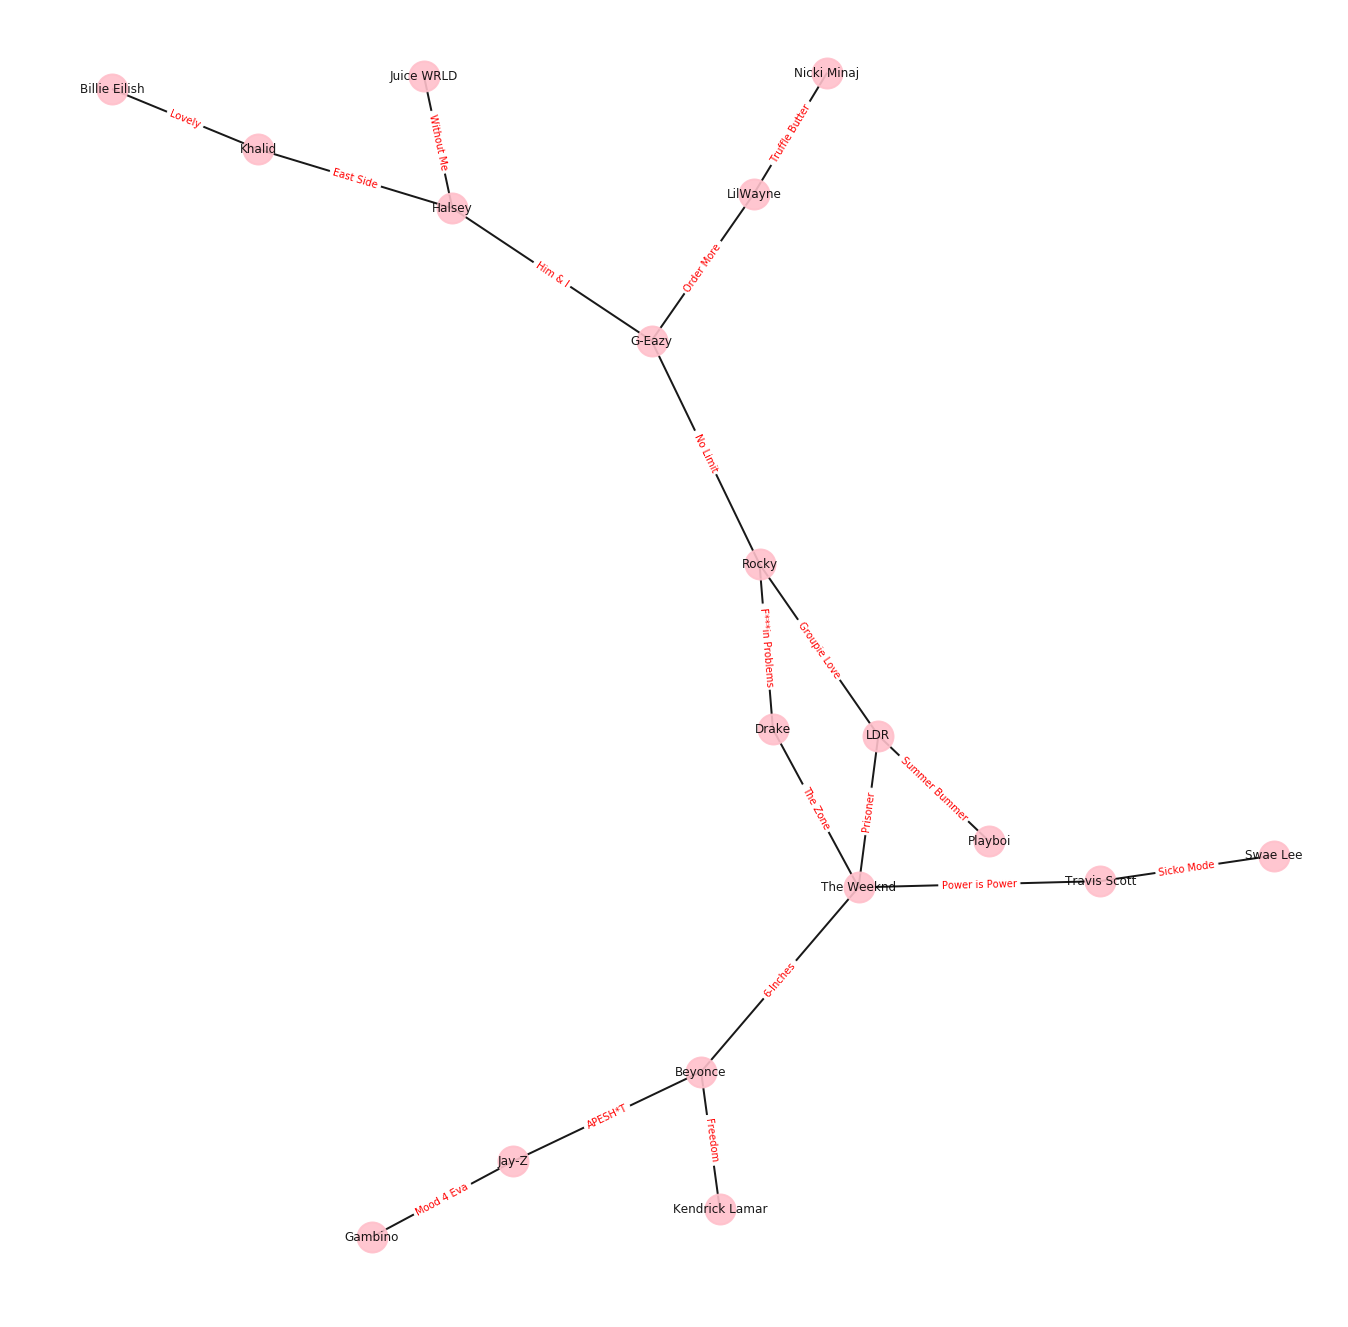

In [122]:
edges=[['LDR','Rocky'],['LDR','Playboi'],['G-Eazy','Halsey'],['LDR','The Weeknd'], ['The Weeknd', 'Beyonce']
       ,['Beyonce', 'Jay-Z'], ['The Weeknd', 'Travis Scott'], ['Travis Scott', 'Swae Lee'], ['Drake', 'The Weeknd']
       ,['Beyonce', 'Kendrick Lamar'],['Halsey', 'Juice WRLD'],['G-Eazy','Rocky'], ['LilWayne', 'Nicki Minaj'], 
       ['Drake', 'Rocky'], ['G-Eazy', 'LilWayne'], ['Halsey', 'Khalid'], ['Jay-Z', 'Gambino'],['Khalid', 'Billie Eilish']]

G=nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(4,figsize=(18,18)) 
nx.draw(G,pos,edge_color='black',width=2,linewidths=2,\
node_size=900,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})


nx.draw_networkx_edge_labels(G,pos,edge_labels={('LDR','Rocky'):'Groupie Love',\
('LDR','Playboi'):'Summer Bummer',('G-Eazy','Halsey'):'Him & I',('LDR','The Weeknd'):'Prisoner',
('The Weeknd', 'Beyonce'):'6-Inches',('Beyonce', 'Jay-Z'):'APESH*T',('The Weeknd', 'Travis Scott'):'Power is Power',
('Travis Scott', 'Swae Lee'):'Sicko Mode',('Drake', 'The Weeknd'):'The Zone',('Beyonce', 'Kendrick Lamar'):'Freedom',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('LilWayne', 'Nicki Minaj'):'Truffle Butter',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('G-Eazy', 'LilWayne'):'Order More',
('Drake', 'Rocky'):'F***in Problems',('Halsey', 'Khalid'):'East Side', ('Jay-Z', 'Gambino'):'Mood 4 Eva', 
                                               ('Khalid', 'Billie Eilish'):'Lovely'},font_color='red')

plt.axis('off')
plt.show()

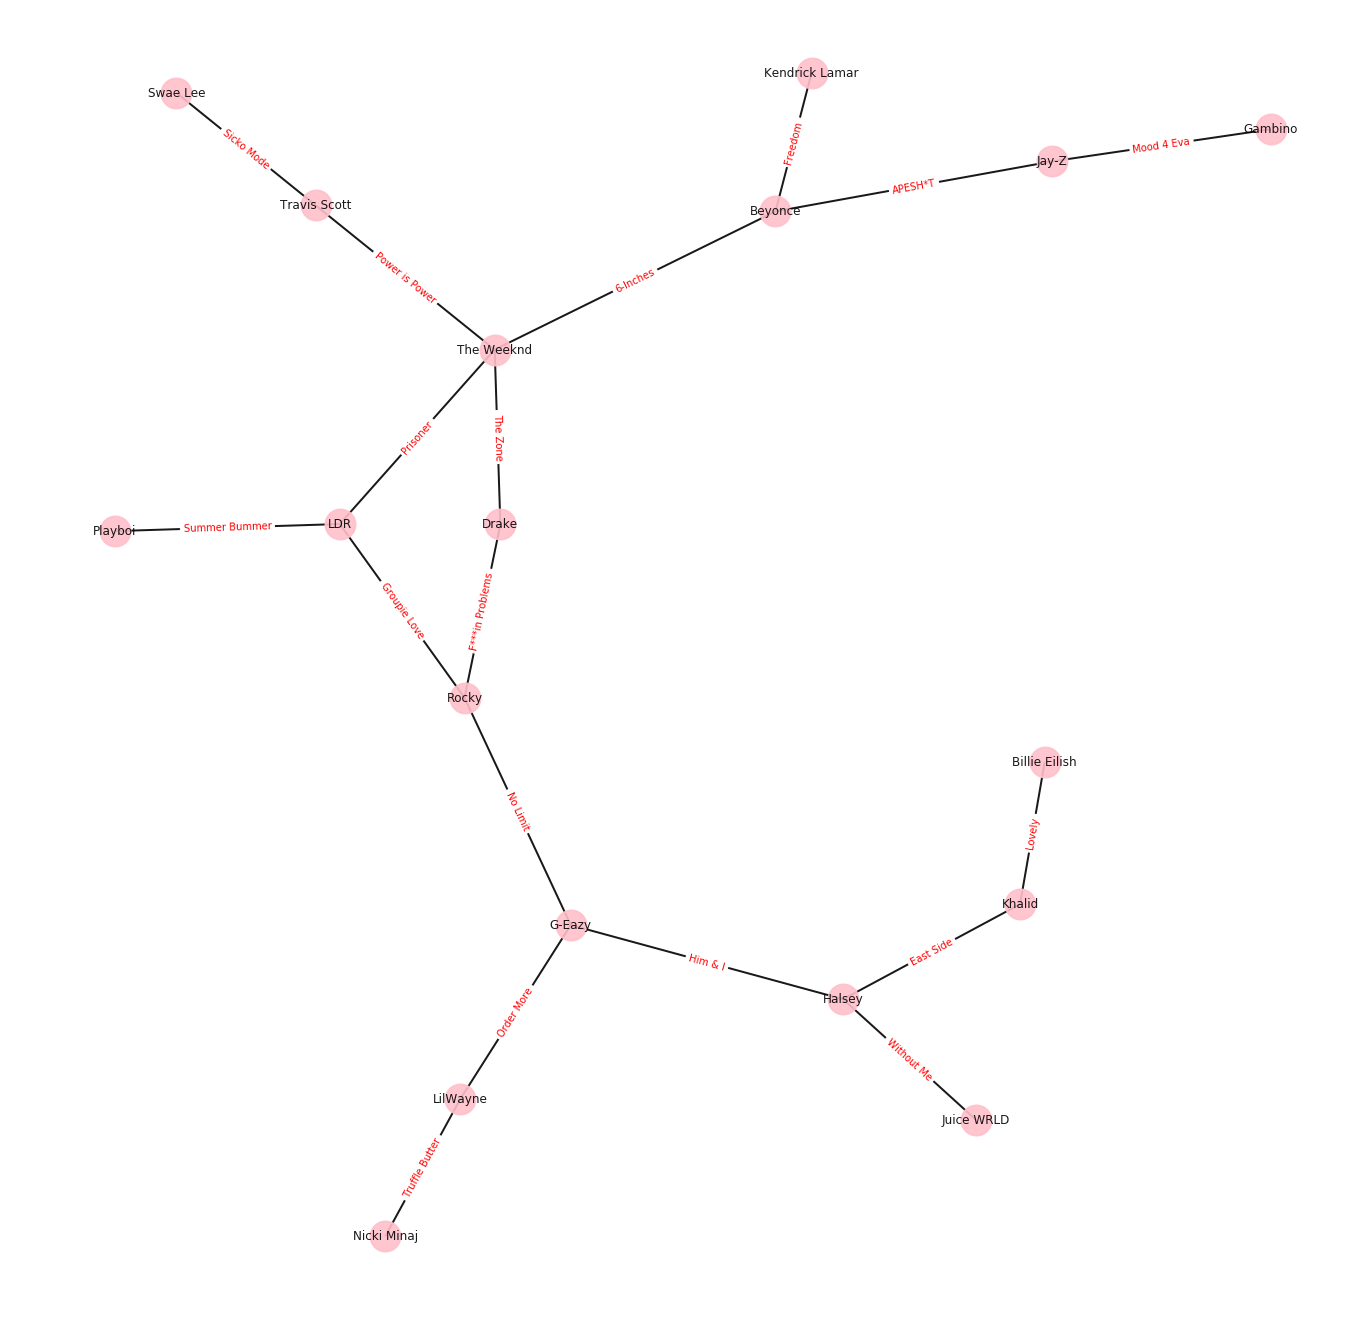

In [123]:
edges=[['LDR','Rocky'],['LDR','Playboi'],['G-Eazy','Halsey'],['LDR','The Weeknd'], ['The Weeknd', 'Beyonce']
       ,['Beyonce', 'Jay-Z'], ['The Weeknd', 'Travis Scott'], ['Travis Scott', 'Swae Lee'], ['Drake', 'The Weeknd']
       ,['Beyonce', 'Kendrick Lamar'],['Halsey', 'Juice WRLD'],['G-Eazy','Rocky'], ['LilWayne', 'Nicki Minaj'], 
       ['Drake', 'Rocky'], ['G-Eazy', 'LilWayne'], ['Halsey', 'Khalid'], ['Jay-Z', 'Gambino'],['Khalid', 'Billie Eilish']]

G=nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(4,figsize=(18,18)) 
nx.draw(G,pos,edge_color='black',width=2,linewidths=2,\
node_size=900,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})


nx.draw_networkx_edge_labels(G,pos,edge_labels={('LDR','Rocky'):'Groupie Love',\
('LDR','Playboi'):'Summer Bummer',('G-Eazy','Halsey'):'Him & I',('LDR','The Weeknd'):'Prisoner',
('The Weeknd', 'Beyonce'):'6-Inches',('Beyonce', 'Jay-Z'):'APESH*T',('The Weeknd', 'Travis Scott'):'Power is Power',
('Travis Scott', 'Swae Lee'):'Sicko Mode',('Drake', 'The Weeknd'):'The Zone',('Beyonce', 'Kendrick Lamar'):'Freedom',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('LilWayne', 'Nicki Minaj'):'Truffle Butter',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('G-Eazy', 'LilWayne'):'Order More',
('Drake', 'Rocky'):'F***in Problems',('Halsey', 'Khalid'):'East Side', ('Jay-Z', 'Gambino'):'Mood 4 Eva', 
                                               ('Khalid', 'Billie Eilish'):'Lovely'},font_color='red')

plt.axis('off')
plt.show()

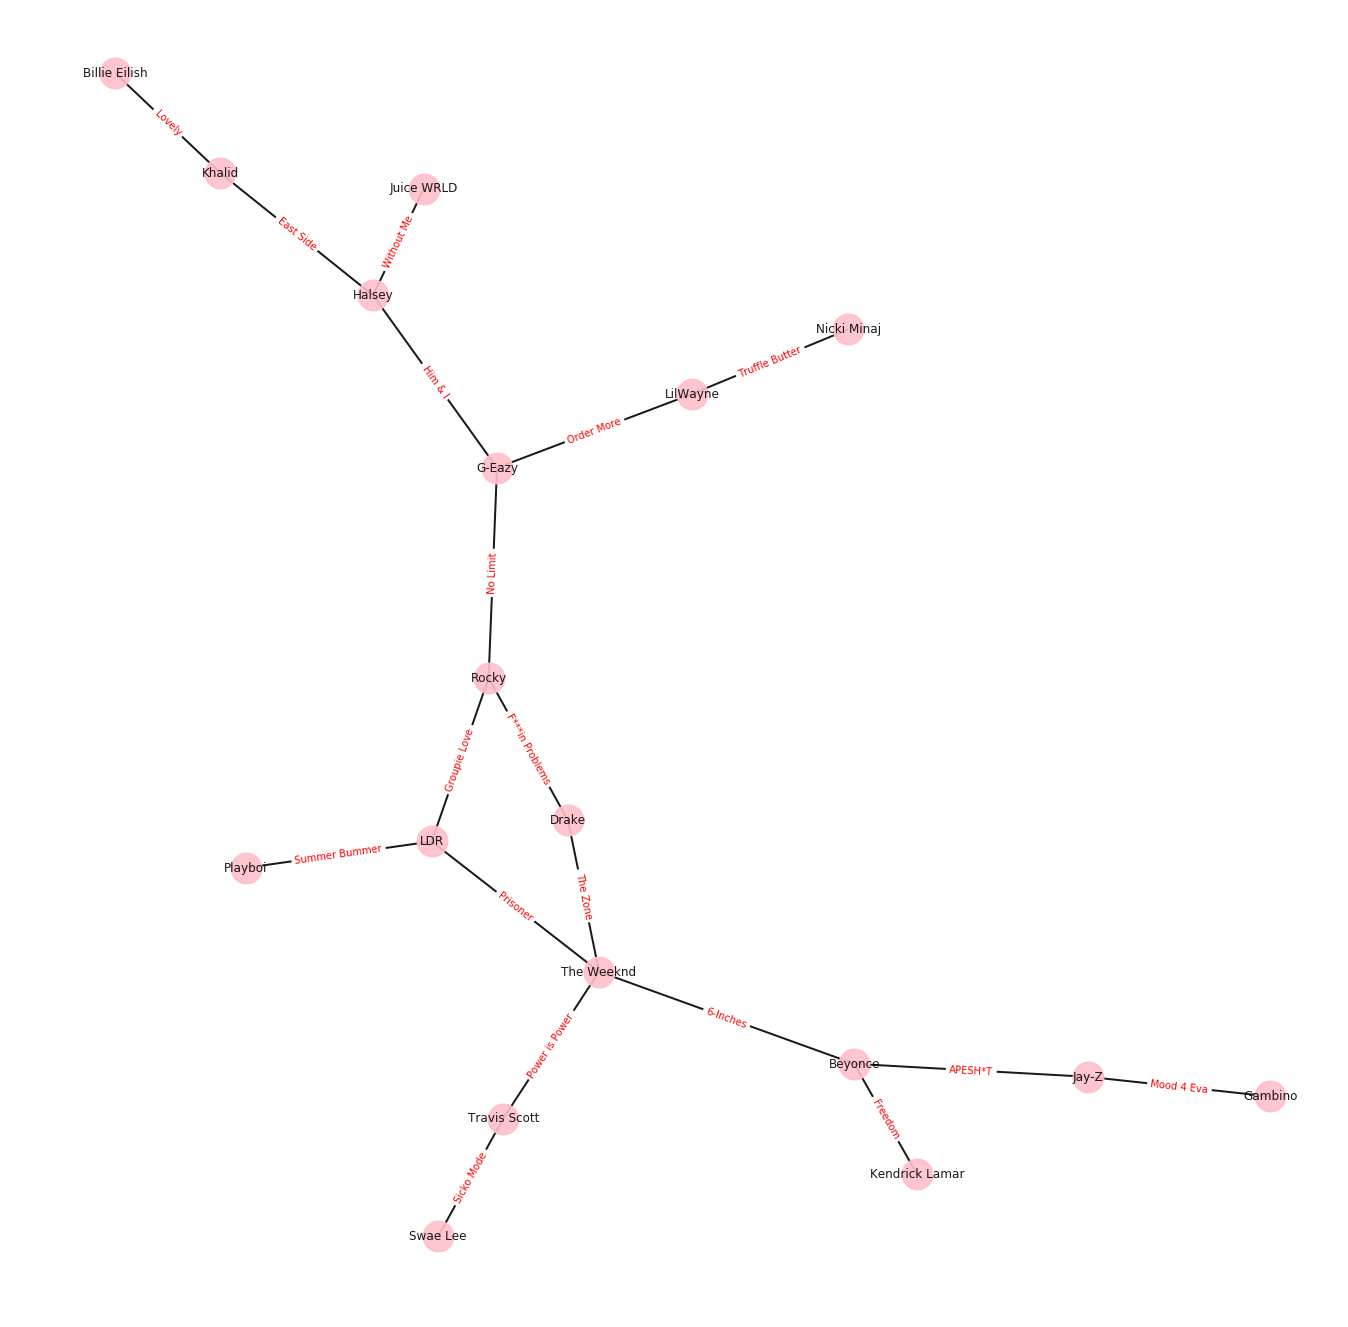

In [124]:
edges=[['LDR','Rocky'],['LDR','Playboi'],['G-Eazy','Halsey'],['LDR','The Weeknd'], ['The Weeknd', 'Beyonce']
       ,['Beyonce', 'Jay-Z'], ['The Weeknd', 'Travis Scott'], ['Travis Scott', 'Swae Lee'], ['Drake', 'The Weeknd']
       ,['Beyonce', 'Kendrick Lamar'],['Halsey', 'Juice WRLD'],['G-Eazy','Rocky'], ['LilWayne', 'Nicki Minaj'], 
       ['Drake', 'Rocky'], ['G-Eazy', 'LilWayne'], ['Halsey', 'Khalid'], ['Jay-Z', 'Gambino'],['Khalid', 'Billie Eilish']]

G=nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(4,figsize=(18,18)) 
nx.draw(G,pos,edge_color='black',width=2,linewidths=2,\
node_size=900,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})


nx.draw_networkx_edge_labels(G,pos,edge_labels={('LDR','Rocky'):'Groupie Love',\
('LDR','Playboi'):'Summer Bummer',('G-Eazy','Halsey'):'Him & I',('LDR','The Weeknd'):'Prisoner',
('The Weeknd', 'Beyonce'):'6-Inches',('Beyonce', 'Jay-Z'):'APESH*T',('The Weeknd', 'Travis Scott'):'Power is Power',
('Travis Scott', 'Swae Lee'):'Sicko Mode',('Drake', 'The Weeknd'):'The Zone',('Beyonce', 'Kendrick Lamar'):'Freedom',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('LilWayne', 'Nicki Minaj'):'Truffle Butter',
('Halsey', 'Juice WRLD'):'Without Me',('G-Eazy','Rocky'):'No Limit',('G-Eazy', 'LilWayne'):'Order More',
('Drake', 'Rocky'):'F***in Problems',('Halsey', 'Khalid'):'East Side', ('Jay-Z', 'Gambino'):'Mood 4 Eva', 
                                               ('Khalid', 'Billie Eilish'):'Lovely'},font_color='red')

plt.axis('off')
plt.show()